# GDP Model: Regression with Feature Selection:
# SelectKBest

In [1]:
#Standard libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from numpy import asarray
from pandas import read_csv
import time
sns.set(style='whitegrid', palette='muted')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 14, 8

#Sklearn
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression


In [2]:
# Imports data
macro = pd.read_csv('US_data_1986_2020.csv', header=0, index_col=0, parse_dates=True, infer_datetime_format=True)
macro.shape

(420, 138)

In [3]:
macro

,OUT1,OUT2,OUT3,OUT4,OUT5,OUT6,OUT7,OUT8,OUT9,OUT10,...,FIN17,FIN18,FIN19,FIN20,FIN21,FIN22,FIN23,FIN24,FIN25,FIN26
Code,,,,,,,,,,,,,,,,,,,,,
1986-01-15,57.3104,61.5499,63.5622,33.8197,74.6419,60.5699,37.1518,77.2313,72.0260,50.4798,...,10.044783,11.433913,0.423913,0.835217,1.375217,1.885217,1.461304,1.050000,1.077826,1.000000
1986-02-15,56.9344,60.9473,62.9724,33.4722,74.0109,60.1851,36.9437,76.5200,71.0729,50.3040,...,9.670000,11.114500,0.324000,0.680500,1.045500,1.415000,1.091000,0.734500,0.953625,0.918625
1986-03-15,56.5420,60.7483,62.7785,33.4568,73.7477,60.1386,36.8845,74.7052,69.5477,49.7407,...,8.986667,10.489048,0.264762,0.453333,0.698571,1.011905,0.747143,0.558571,1.006548,0.978155
1986-04-15,56.5599,60.7675,62.9333,33.1739,74.1919,60.0577,36.8584,74.0783,68.8053,49.6342,...,8.788636,10.190455,0.205000,0.459545,0.818182,1.063636,0.858636,0.604091,0.879716,0.829034
1986-05-15,56.6823,60.9250,63.1728,33.1434,74.6133,60.2090,36.8029,74.3373,69.1575,49.6476,...,9.090000,10.289545,0.315455,0.736818,1.198182,1.379545,1.064091,0.642727,0.844375,0.811818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-15,102.8885,99.5522,99.8433,91.2899,105.0636,121.8763,101.6691,115.3871,109.5078,106.0040,...,2.246190,3.274286,0.026190,0.035238,0.162381,0.545714,0.519524,0.510476,0.148240,0.193616
2020-09-15,102.7766,98.7596,99.3909,90.8668,103.9916,120.1046,101.8162,114.9662,108.8828,106.3346,...,2.314545,3.365909,0.019091,0.026364,0.162273,0.572727,0.553636,0.546364,0.128252,0.160627
2020-10-15,103.9494,99.7284,100.6768,91.8450,104.8031,121.0147,103.1136,114.1621,108.7693,107.3512,...,2.353636,3.440455,0.027273,0.049545,0.235455,0.686818,0.659545,0.637273,0.120837,0.133240


In [4]:
# Imports data
tran_code = pd.read_csv('US_data_transform_code.csv', header=0, index_col=0, parse_dates=False)
tran_code.shape

(1, 138)

In [5]:
tran_code

,OUT1,OUT2,OUT3,OUT4,OUT5,OUT6,OUT7,OUT8,OUT9,OUT10,...,FIN17,FIN18,FIN19,FIN20,FIN21,FIN22,FIN23,FIN24,FIN25,FIN26
Symbol,,,,,,,,,,,,,,,,,,,,,
Tran_code,5,5,5,5,5,5,5,5,5,5,...,2,2,1,1,1,1,1,1,1,1


In [6]:
def data_transform(x, tran_code):
    
    if tran_code == 1:
        x_tr = x        
        
    elif tran_code == 2:
        x_tr = x.diff()
            
    elif tran_code == 3:
        x_tr = x.diff().diff()
        
    elif tran_code == 4:
        x_tr = np.log(x)
        
    elif tran_code == 5:
        x_tr = np.log(x).diff()*100
    
    else :
        x_tr = np.log(x).diff().diff()*100
    
    return x_tr    

In [7]:
macro_tr=[]

for col in macro.columns:
    tr_code = tran_code[col].values
    data_tr = data_transform(macro[col], tr_code)
    macro_tr.append(data_tr)

macro_tr = pd.DataFrame(macro_tr).T

In [8]:
macro_tr

,OUT1,OUT2,OUT3,OUT4,OUT5,OUT6,OUT7,OUT8,OUT9,OUT10,...,FIN17,FIN18,FIN19,FIN20,FIN21,FIN22,FIN23,FIN24,FIN25,FIN26
Code,,,,,,,,,,,,,,,,,,,,,
1986-01-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.423913,0.835217,1.375217,1.885217,1.461304,1.050000,1.077826,1.000000
1986-02-15,-0.658238,-0.983867,-0.932242,-1.032823,-0.848963,-0.637326,-0.561709,-0.925267,-1.332105,-0.348866,...,-0.374783,-0.319413,0.324000,0.680500,1.045500,1.415000,1.091000,0.734500,0.953625,0.918625
1986-03-15,-0.691600,-0.327046,-0.308388,-0.046019,-0.356257,-0.077292,-0.160372,-2.400244,-2.169326,-1.126109,...,-0.683333,-0.625452,0.264762,0.453333,0.698571,1.011905,0.747143,0.558571,1.006548,0.978155
1986-04-15,0.031653,0.031601,0.246278,-0.849163,0.600517,-0.134613,-0.070786,-0.842706,-1.073207,-0.214340,...,-0.198030,-0.298593,0.205000,0.459545,0.818182,1.063636,0.858636,0.604091,0.879716,0.829034
1986-05-15,0.216174,0.258849,0.379839,-0.091982,0.566380,0.251608,-0.150690,0.349020,0.510574,0.026994,...,0.301364,0.099091,0.315455,0.736818,1.198182,1.379545,1.064091,0.642727,0.844375,0.811818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-15,0.956954,1.358427,1.390283,2.529480,0.943199,-0.843683,1.348295,-1.489197,-1.450422,0.430153,...,0.091843,-0.049193,0.026190,0.035238,0.162381,0.545714,0.519524,0.510476,0.148240,0.193616
2020-09-15,-0.108818,-0.799352,-0.454140,-0.464546,-1.025575,-1.464357,0.144580,-0.365439,-0.572371,0.311390,...,0.068355,0.091623,0.019091,0.026364,0.162273,0.572727,0.553636,0.546364,0.128252,0.160627
2020-10-15,1.134654,0.976188,1.285483,1.070768,0.777322,0.754900,1.266207,-0.701880,-0.104295,0.951498,...,0.039091,0.074545,0.027273,0.049545,0.235455,0.686818,0.659545,0.637273,0.120837,0.133240


In [9]:
# Imports data
gdp = pd.read_csv('US_gdp_1986_2020.csv', header=0, index_col=0, parse_dates=True, infer_datetime_format=True)
gdp.shape

(420, 1)

In [10]:
gdp

,GDP
Date,
1986-01-15,5.856124
1986-02-15,2.326601
1986-03-15,0.419543
1986-04-15,1.868664
1986-05-15,1.994311
...,...
2020-08-15,35.814264
2020-09-15,10.003440
2020-10-15,-4.970377


In [11]:
macro_final = pd.concat([macro_tr, gdp], axis=1)
macro_final

,OUT1,OUT2,OUT3,OUT4,OUT5,OUT6,OUT7,OUT8,OUT9,OUT10,...,FIN18,FIN19,FIN20,FIN21,FIN22,FIN23,FIN24,FIN25,FIN26,GDP
1986-01-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.423913,0.835217,1.375217,1.885217,1.461304,1.050000,1.077826,1.000000,5.856124
1986-02-15,-0.658238,-0.983867,-0.932242,-1.032823,-0.848963,-0.637326,-0.561709,-0.925267,-1.332105,-0.348866,...,-0.319413,0.324000,0.680500,1.045500,1.415000,1.091000,0.734500,0.953625,0.918625,2.326601
1986-03-15,-0.691600,-0.327046,-0.308388,-0.046019,-0.356257,-0.077292,-0.160372,-2.400244,-2.169326,-1.126109,...,-0.625452,0.264762,0.453333,0.698571,1.011905,0.747143,0.558571,1.006548,0.978155,0.419543
1986-04-15,0.031653,0.031601,0.246278,-0.849163,0.600517,-0.134613,-0.070786,-0.842706,-1.073207,-0.214340,...,-0.298593,0.205000,0.459545,0.818182,1.063636,0.858636,0.604091,0.879716,0.829034,1.868664
1986-05-15,0.216174,0.258849,0.379839,-0.091982,0.566380,0.251608,-0.150690,0.349020,0.510574,0.026994,...,0.099091,0.315455,0.736818,1.198182,1.379545,1.064091,0.642727,0.844375,0.811818,1.994311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-15,0.956954,1.358427,1.390283,2.529480,0.943199,-0.843683,1.348295,-1.489197,-1.450422,0.430153,...,-0.049193,0.026190,0.035238,0.162381,0.545714,0.519524,0.510476,0.148240,0.193616,35.814264
2020-09-15,-0.108818,-0.799352,-0.454140,-0.464546,-1.025575,-1.464357,0.144580,-0.365439,-0.572371,0.311390,...,0.091623,0.019091,0.026364,0.162273,0.572727,0.553636,0.546364,0.128252,0.160627,10.003440
2020-10-15,1.134654,0.976188,1.285483,1.070768,0.777322,0.754900,1.266207,-0.701880,-0.104295,0.951498,...,0.074545,0.027273,0.049545,0.235455,0.686818,0.659545,0.637273,0.120837,0.133240,-4.970377
2020-11-15,0.865036,0.786941,0.630527,2.027112,0.350520,1.872542,1.402063,1.371742,0.251317,1.149756,...,-0.143312,0.025714,0.075714,0.300000,0.784286,0.758571,0.708571,0.128574,0.148347,-4.201695


In [12]:
# Show rows and columns
print("Rows, Columns:");print(macro_final.shape);print("\n")

# Describe DataFrame columns
print("Columns:");print(macro_final.columns);print("\n")

# Show info on DataFrame
print("Info:");print(macro_final.info(max_cols=1000)); print("\n")

# Count Non-NA values
print("Non-NA:");print(macro_final.count()); print("\n")

# Show head
print("Head");print(macro_final.head()); print("\n")

# Show tail
print("Tail");print(macro_final.tail());print("\n")

# Show summary statistics
print("Summary statistics:");print(macro_final.describe());print("\n")

Rows, Columns:
(420, 139)


Columns:
Index(['OUT1', 'OUT2', 'OUT3', 'OUT4', 'OUT5', 'OUT6', 'OUT7', 'OUT8', 'OUT9',
       'OUT10',
       ...
       'FIN18', 'FIN19', 'FIN20', 'FIN21', 'FIN22', 'FIN23', 'FIN24', 'FIN25',
       'FIN26', 'GDP'],
      dtype='object', length=139)


Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 420 entries, 1986-01-15 to 2020-12-15
Data columns (total 139 columns):
 #    Column  Non-Null Count  Dtype  
---   ------  --------------  -----  
 0    OUT1    419 non-null    float64
 1    OUT2    419 non-null    float64
 2    OUT3    419 non-null    float64
 3    OUT4    419 non-null    float64
 4    OUT5    419 non-null    float64
 5    OUT6    419 non-null    float64
 6    OUT7    419 non-null    float64
 7    OUT8    419 non-null    float64
 8    OUT9    419 non-null    float64
 9    OUT10   419 non-null    float64
 10   OUT11   419 non-null    float64
 11   OUT12   419 non-null    float64
 12   OUT13   419 non-null    float64
 13   OUT14   419

In [13]:
#Define Data for Machine Learning

X_start = 1  # 1986-M2
X_lag = 1

# Features and Target
X, y = macro_final.iloc[X_start:,:-1].shift(X_lag).dropna(), macro_final.iloc[X_start+X_lag:,138]


In [14]:
X

,OUT1,OUT2,OUT3,OUT4,OUT5,OUT6,OUT7,OUT8,OUT9,OUT10,...,FIN17,FIN18,FIN19,FIN20,FIN21,FIN22,FIN23,FIN24,FIN25,FIN26
1986-03-15,-0.658238,-0.983867,-0.932242,-1.032823,-0.848963,-0.637326,-0.561709,-0.925267,-1.332105,-0.348866,...,-0.374783,-0.319413,0.324000,0.680500,1.045500,1.415000,1.091000,0.734500,0.953625,0.918625
1986-04-15,-0.691600,-0.327046,-0.308388,-0.046019,-0.356257,-0.077292,-0.160372,-2.400244,-2.169326,-1.126109,...,-0.683333,-0.625452,0.264762,0.453333,0.698571,1.011905,0.747143,0.558571,1.006548,0.978155
1986-05-15,0.031653,0.031601,0.246278,-0.849163,0.600517,-0.134613,-0.070786,-0.842706,-1.073207,-0.214340,...,-0.198030,-0.298593,0.205000,0.459545,0.818182,1.063636,0.858636,0.604091,0.879716,0.829034
1986-06-15,0.216174,0.258849,0.379839,-0.091982,0.566380,0.251608,-0.150690,0.349020,0.510574,0.026994,...,0.301364,0.099091,0.315455,0.736818,1.198182,1.379545,1.064091,0.642727,0.844375,0.811818
1986-07-15,-0.326383,-0.300657,-0.180462,-0.939427,0.074624,1.165925,-0.532897,-0.882174,-0.312239,-0.496724,...,0.042381,0.049978,0.335714,0.788095,1.240952,1.402857,1.067143,0.614762,0.854940,0.825120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-15,4.113233,4.859967,4.263592,6.785744,4.590834,15.809565,6.917483,4.324830,4.280300,3.931554,...,-0.273379,-0.321522,0.018696,0.021304,0.151739,0.498696,0.480000,0.477391,0.140366,0.197133
2020-09-15,0.956954,1.358427,1.390283,2.529480,0.943199,-0.843683,1.348295,-1.489197,-1.450422,0.430153,...,0.091843,-0.049193,0.026190,0.035238,0.162381,0.545714,0.519524,0.510476,0.148240,0.193616
2020-10-15,-0.108818,-0.799352,-0.454140,-0.464546,-1.025575,-1.464357,0.144580,-0.365439,-0.572371,0.311390,...,0.068355,0.091623,0.019091,0.026364,0.162273,0.572727,0.553636,0.546364,0.128252,0.160627
2020-11-15,1.134654,0.976188,1.285483,1.070768,0.777322,0.754900,1.266207,-0.701880,-0.104295,0.951498,...,0.039091,0.074545,0.027273,0.049545,0.235455,0.686818,0.659545,0.637273,0.120837,0.133240


In [15]:
y

1986-03-15     0.419543
1986-04-15     1.868664
1986-05-15     1.994311
1986-06-15     3.417124
1986-07-15     5.287989
                ...    
2020-08-15    35.814264
2020-09-15    10.003440
2020-10-15    -4.970377
2020-11-15    -4.201695
2020-12-15     5.601401
Name: GDP, Length: 418, dtype: float64

# Feature Selection: SelectKBest

In [16]:
model_KBest = SelectKBest(score_func=f_regression, k=10)

model_KBest = model_KBest.fit(X, y)

KBest = model_KBest.get_support()
KBest

array([False,  True,  True,  True, False,  True,  True, False, False,
       False, False, False, False, False, False,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [17]:
#Identifying the selected features

KBest_feature = []

for i in range(0,KBest.shape[0]):
    if KBest[i] == True:
        K_feature = X.columns[i]
        KBest_feature.append(K_feature)
    
KBest_feature       

['OUT2',
 'OUT3',
 'OUT4',
 'OUT6',
 'OUT7',
 'OUT16',
 'OUT17',
 'OUT18',
 'RSC7',
 'RSC11']

# Grid Search for Optimal Hyperparameters

In [18]:
n_train = 334   # 2013-M12
n_records = len(X)
n_forecast = n_records-n_train

j = 0
for i in range(n_train, n_records):    
    #train, test = X[0:i], X[i:i+1]   #expanding window
    train, test = X[j:i], X[i:i+1]   #rolling window
#    print('train=%d, test=%d' % (len(train), len(test)))
    j += 1

In [19]:
# pipeline
def pipeline(config):

    # unpack config
    n_features = config

    # Steps
    steps = [('SelectKBest', SelectKBest(score_func=f_regression, k=n_features)),
             ('ols', LinearRegression())
            ]

    pipeline = Pipeline(steps)

    return pipeline

In [20]:
def walk_forward_validation(cfg):
    
    n_train = 334

    n_records = len(X)

    y_test_list = []
    
    y_pred_list = []

    j = 0

    for i in range(n_train, n_records):
    
        X_train, X_test, y_train, y_test = X[j:i], X[i:i+1], y[j:i], y[i:i+1]
       
        model = pipeline(cfg).fit(X_train, y_train)        
    
        y_pred = model.predict(X_test)
    
        y_pred_list.extend(y_pred)
    
        y_test_list.extend(y_test)

        j += 1
    
    score_rmse = metrics.mean_squared_error(y_test_list, y_pred_list, squared=False)
    
    print(' > %.3f' % score_rmse)
    
    return score_rmse 

In [21]:
# score a model, return None on failure
def repeat_evaluate(config, n_repeats=1):
    # convert config to a key
    key = str(config)
    # fit and evaluate the model n times
    scores = [walk_forward_validation(config) for _ in range(n_repeats)]
    # summarize score
    result = np.mean(scores)
    print('> Model[%s] %.3f' % (key, result))
    return (key, result)

In [22]:
# grid search configs
def grid_search(cfg_list):
    # evaluate configs
    scores = [repeat_evaluate(cfg) for cfg in cfg_list]
    # sort configs by score_rmse, asc
    #scores.sort(key=lambda tup: tup[1])
    scores.sort(key=lambda tup: tup[1], reverse=True)
    return scores

In [23]:
# create a list of configs to try
def model_configs():
    # define scope of configs
      
    n_features = [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44,46,48,50,52,54,56,58,60]

    #n_features = [10]
     
    # create configs
    configs = list()
    
    for k in n_features:
        cfg = k
        configs.append(cfg)

    print('Total configs: %d' % len(configs))
    return configs

In [24]:
# model configs
cfg_list = model_configs()

Total configs: 30


In [25]:
cfg_list = model_configs()
# grid search
scores = grid_search(cfg_list)
print('done')

Total configs: 30
 > 12.981
> Model[2] 12.981
 > 13.980
> Model[4] 13.980
 > 13.597
> Model[6] 13.597
 > 14.138
> Model[8] 14.138
 > 14.251
> Model[10] 14.251
 > 14.207
> Model[12] 14.207
 > 13.822
> Model[14] 13.822
 > 13.271
> Model[16] 13.271
 > 12.724
> Model[18] 12.724
 > 12.429
> Model[20] 12.429
 > 12.389
> Model[22] 12.389
 > 12.247
> Model[24] 12.247
 > 12.155
> Model[26] 12.155
 > 11.638
> Model[28] 11.638
 > 11.319
> Model[30] 11.319
 > 11.302
> Model[32] 11.302
 > 11.468
> Model[34] 11.468
 > 11.445
> Model[36] 11.445
 > 11.276
> Model[38] 11.276
 > 11.514
> Model[40] 11.514
 > 11.129
> Model[42] 11.129
 > 11.236
> Model[44] 11.236
 > 11.220
> Model[46] 11.220
 > 11.083
> Model[48] 11.083
 > 11.114
> Model[50] 11.114
 > 11.007
> Model[52] 11.007
 > 11.269
> Model[54] 11.269
 > 11.469
> Model[56] 11.469
 > 11.097
> Model[58] 11.097
 > 11.025
> Model[60] 11.025
done


In [26]:
scores

[('10', 14.25125322903456),
 ('12', 14.207172086420487),
 ('8', 14.138396493484965),
 ('4', 13.98002470701739),
 ('14', 13.821978108741149),
 ('6', 13.596791730013024),
 ('16', 13.271230004127624),
 ('2', 12.981011569567995),
 ('18', 12.723834238273824),
 ('20', 12.429279898580196),
 ('22', 12.388864205593134),
 ('24', 12.247449620741811),
 ('26', 12.154937547447958),
 ('28', 11.638190333114832),
 ('40', 11.513704847992198),
 ('56', 11.468752125252374),
 ('34', 11.467931436594947),
 ('36', 11.44514167256054),
 ('30', 11.318821851631096),
 ('32', 11.301577084217811),
 ('38', 11.275709741970248),
 ('54', 11.269025096112719),
 ('44', 11.236307025020116),
 ('46', 11.219898665422495),
 ('42', 11.129282133116044),
 ('50', 11.113517093123187),
 ('58', 11.097206121181902),
 ('48', 11.0828381088725),
 ('60', 11.024700276834999),
 ('52', 11.006965367792299)]

# Model Estimation & Evaluation

In [27]:
# Pipeline

# Steps
steps_final = [('SelectKBest', SelectKBest(score_func=f_regression, k=52)),
               ('ols', LinearRegression())
              ]

pipeline_final = Pipeline(steps_final)

In [28]:
start=time.time()    
   
n_train = 334

n_records = len(X)

y_test_list = []
    
y_pred_list = []

j = 0

for i in range(n_train, n_records):
    
    X_train, X_test, y_train, y_test = X[j:i], X[i:i+1], y[j:i], y[i:i+1]
        
    model = pipeline_final.fit(X_train, y_train)            

    y_pred = model.predict(X_test)
    
    y_pred_list.extend(y_pred)
    
    y_test_list.extend(y_test)

    j += 1
    
end=time.time()

print("Running Time:", end - start)

Running Time: 0.5671391487121582


In [29]:
metrics.mean_squared_error(y_test_list, y_pred_list, squared=False)


11.006965367792299

In [30]:
pd.options.display.max_rows=300
result = pd.DataFrame({'GDP_growth_Actual': y[-n_forecast:], 'GDP_growth_Predicted': y_pred_list}, columns=['GDP_growth_Actual', 'GDP_growth_Predicted'])
result

,GDP_growth_Actual,GDP_growth_Predicted
2014-01-15,-3.702146,0.465781
2014-02-15,-0.301000,0.909966
2014-03-15,4.339873,1.789119
2014-04-15,6.627801,2.573983
2014-05-15,6.985986,2.932440
2014-06-15,6.185521,2.911325
2014-07-15,5.180639,3.307627
2014-08-15,3.289047,2.406237
2014-09-15,2.205442,1.922259
2014-10-15,1.302360,0.714304


<AxesSubplot:>

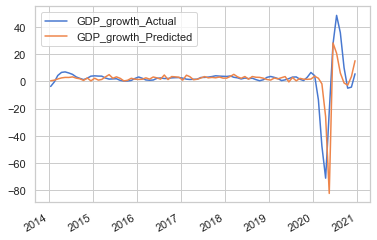

In [31]:
result['GDP_growth_Actual'].plot(legend=True)
result['GDP_growth_Predicted'].plot(legend=True)

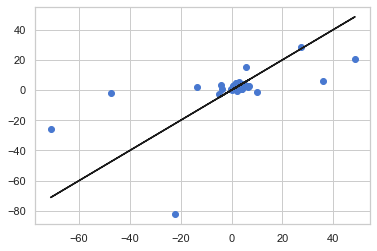

In [32]:
plt.scatter(y_test_list, y_pred_list)
plt.plot(y_test_list, y_test_list,'k-') # identity line

In [33]:
result.corr()

,GDP_growth_Actual,GDP_growth_Predicted
GDP_growth_Actual,1.000000,0.549563
GDP_growth_Predicted,0.549563,1.000000
